# <font color='green'>Homework 4</font>

<div class="alert alert-block alert-warning">
<b>
University of Tehran<br>
Spring 2023<br>
Course: Machine Learning<br>
</div>


***

<div class="alert alert-block alert-success">
<b>Author:</b><br>
Name: Taban Soleymani <br />
Student Number: 810100377
</div>

***

# <span style="color:purple">Question 7 Part 1</span>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
from sklearn import datasets
from sklearn import preprocessing

In [18]:
df=pd.read_csv("/content/sample_data/Q7-Part1.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [29]:
df_position = pd.get_dummies(df['Position'])
df = pd.concat([df, df_position], axis=1)
print(df)

            Position  Level   Salary  Business Analyst  C-level  CEO  \
0   Business Analyst      1    45000                 1        0    0   
1  Junior Consultant      2    50000                 0        0    0   
2  Senior Consultant      3    60000                 0        0    0   
3            Manager      4    80000                 0        0    0   
4    Country Manager      5   110000                 0        0    0   
5     Region Manager      6   150000                 0        0    0   
6            Partner      7   200000                 0        0    0   
7     Senior Partner      8   300000                 0        0    0   
8            C-level      9   500000                 0        1    0   
9                CEO     10  1000000                 0        0    1   

   Country Manager  Junior Consultant  Manager  Partner  Region Manager  \
0                0                  0        0        0               0   
1                0                  1        0        0  

In [30]:
X = df.drop(['Position', 'Salary'], axis=1)
y = df['Salary']

In [55]:
from sklearn.svm import SVR
from sklearn.metrics import classification_report, accuracy_score

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.5)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=7)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

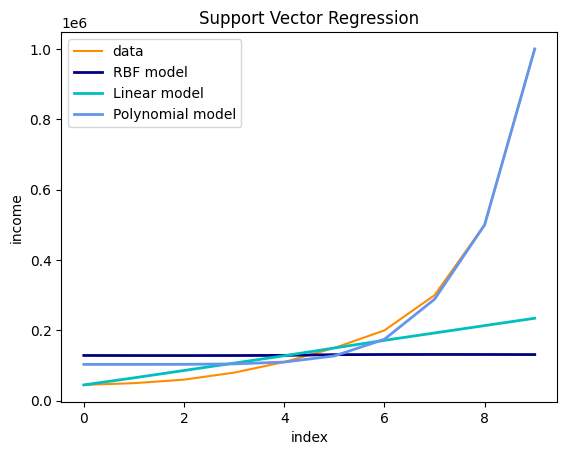

In [60]:
lw = 2
plt.plot(y, color='darkorange', label='data')
plt.plot(y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(y_lin, color='c', lw=lw, label='Linear model')
plt.plot(y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('index')
plt.ylabel('income')
plt.title('Support Vector Regression')
plt.legend()
plt.show()